In [3]:
import random as rn
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import math

In [4]:
def policzenie_calki(n,przedzial,funkcja,N): #metoda monte carlo, n-ile wymiarow, przedział-przedział, po ktorym całkujemy

        wynik_sredni=[]
    
        for i in range(0, N): #N-dokładnosc, ile prób

            liczby=[] #liczby z ktorych wywołamy funkcje
            iloczyn=[] #to czym trzeba pomnożyć

            for i in range(0,len(przedzial),2): #idziemy po poszczegolnych przedziałach
                #print('i',i)
                p=[przedzial[i],przedzial[i+1]] #przedzial po jakim całkujemy dla i-tego wymiaru
                u=rn.uniform(p[0],p[1]) #liczba z tego przedziału
                liczby.append(u)
            
            #print('liczby',liczby,'funkcja(liczby)',funkcja(liczby))
            wynik_sredni.append(funkcja(liczby))
        

        wynik_sredni=sum(wynik_sredni)/N

        iloczyn=1

        for i in range(0,n,2):
            iloczyn=iloczyn*(przedzial[i+1]-przedzial[i])

        wynik_sredni=wynik_sredni*iloczyn

        return wynik_sredni

In [9]:

class kula:
    
    def __init__(self,R):
        self.R=R
    def funkcja_objetosci(self,x):
        return self.R**2-np.power(x,2)
        
    def objetosc(self,N):  #objetosc metoda monte carlo
        return math.pi*policzenie_calki(1,[-self.R,self.R],self.funkcja_objetosci,N)[0]
        
    
    def funkcja_pola_powierzchni(self,a): #funkcja do scałkowania żeby uzyskać p.powierzchni
        return 2*math.pi*self.R*self.R*np.sin(a)

    def pole_powierzchni(self,N): #pole powierzchni to całka od 0 do pi z 2piR**2sina da -> https://www.youtube.com/watch?v=tKRnUjC26lY
    
        return policzenie_calki(1,[0,math.pi],self.funkcja_pola_powierzchni,N)[0]

    def stosunek(self,N):
        return self.pole_powierzchni(N)/self.objetosc(N)


In [13]:
#przykład
b=kula(5) #kula o promieniu 2
#dokladnosc 1500 punktow, powinno wyjść 3/R => u nas 1.5
print('objetosc:',b.objetosc(1500))
print('pole_powierzchni',b.pole_powierzchni(1500))
print('stosunek',b.stosunek(1500))

objetosc: 517.2126896154516
pole_powierzchni 314.6626166186006
stosunek 0.6020904373665457


In [18]:
s=[]
x=[0,1,2,3,4,5,6,7,8,9,10]
for j in x:
    o=[]
    p=[]
    for i in range(0,100):
        b=kula(j)
        p.append(b.pole_powierzchni(1500))
        o.append(b.objetosc(1500))
    o=np.array(o)
    p=np.array(p)
    s.append(np.mean(p)/np.mean(o))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0,0.5,'P/V')

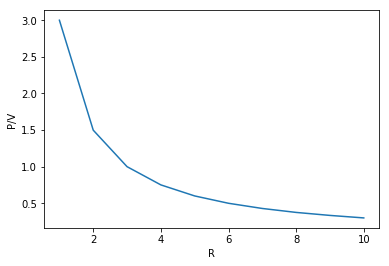

In [19]:
plt.plot(x[1:],s[1:])
plt.xlabel('R')
plt.ylabel('P/V') #P-pole powierzchni, V-objętość